1. Построить классификатор изображений рукописного ввода на базе MNIST.

2. Классификатор предлагается строить на признаках, полученных в результате предобработки изображений, например, гистограммы градиентов (HOG) или результат PCA преобразования.

3. В качестве модели классификатора можно использовать любую известную Вам модель, за исключением сверточных нейронных сетей.

4. Критерием качества классификатора является метрика accuracy. Для получения зачета по данной работе, значение метрики accuracy должно быть больше 0.6. Метрика оценивается на тестовой выборке в рамках контеста Digit Recognizer на Kaggle.

5. Решение необходимо предоставить в виде ipython-ноутбука с реализацией процесса построения модели и скриншота с финальным результатом на Kaggle.

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler=StandardScaler()

from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df_test = pd.read_csv("test.csv")

In [4]:
df_test.shape

(28000, 784)

In [5]:
df.shape

(42000, 785)

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


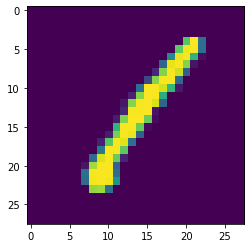

In [8]:
plt.imshow(df.iloc[0, 1:].values.reshape(28,28))

In [9]:
X, y = df.iloc[:,1:], df.iloc[:,0]

In [10]:
X_train = scaler.fit_transform(X)

In [11]:
X_test = scaler.transform(df_test)

In [12]:
pca = PCA(n_components = 0.9)

X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

In [13]:
explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance.cumsum()

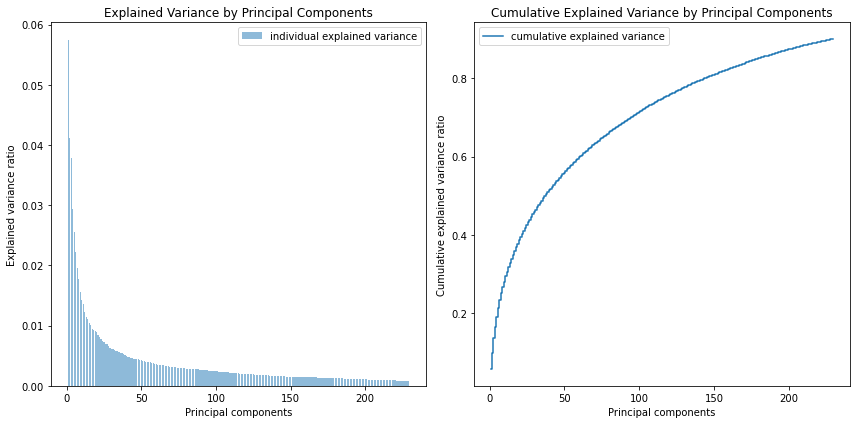

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.legend()

plt.subplot(1, 2, 2)
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         where='mid', label='cumulative explained variance')

plt.ylabel('Cumulative explained variance ratio')
plt.xlabel('Principal components')
plt.title('Cumulative Explained Variance by Principal Components')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors=10)

In [16]:
knn.fit(X_train, y)

y_pred = knn.predict(X_test)

In [17]:
with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_pred, 1):
        dst.write('%s,%s\n' % (i, p))